In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
from sklearn.metrics import r2_score

xdata = ydata = np.array([1, 2, 3, 4, 5])

# Do a curve fit of our exponential curve, minimizing squared error.
exp_func = lambda x, b, m: b * m**x
exp_params, _ = scipy.optimize.curve_fit(
    f=exp_func,
    xdata=xdata,
    ydata=ydata,
    p0=(1, 1),
)

In [2]:
# This function should exactly reproduce the behavior of Google Sheets' LOGEST
def LOGEST(xdata, ydata):
    # Do a linear fit in log-space.
    ydata = np.log(ydata)
    # If you want to compare to the R^2 value that Google's LOGEST produces,
    # compare to the value returned by this linregress!
    # (That is, do *not* use sklearn.metrics.r2_score on the fit after. That will give a different answer.)
    slope, intercept, _, _, _ = scipy.stats.linregress(xdata, ydata)
    # Transform the parameters of our linear fit into an exponential curve.
    return np.exp(intercept), np.exp(slope)

In [3]:
# Note that these parameters can also be fed into our exp_func from above.
# It's just an alternative cost model to use when fitting.
logest_params = LOGEST(xdata, ydata)

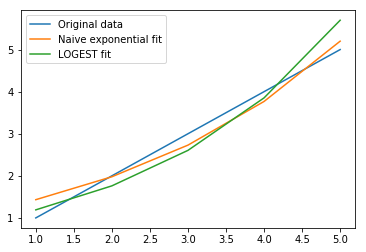

In [4]:
plt.plot(xdata, ydata)
plt.plot(xdata, exp_func(xdata, *exp_params))
plt.plot(xdata, exp_func(xdata, *logest_params))
plt.legend(["Original data", "Naive exponential fit", "LOGEST fit"])